# 结果展示

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import datetime
import time
import os

%matplotlib inline
from utils import config
from utils.backtest import backtest_stats, backtest_plot, get_baseline
from utils.simple_backtest import simple_backtest_plot

/Users/liuan/miniconda3/envs/rl-stock/lib/python3.9/site-packages/pyfolio/pos.py:26: UserWarning: Module "zipline.assets" not found; mutltipliers will not be applied to position notionals.
  warnings.warn(


## 数据读取

In [2]:
root_path = os.getcwd()
root_path = os.path.join(root_path, "learn", "trade_file")
print("root_path: ", root_path)

root_path:  /Users/liuan/NUS/ME5406 Deep Learning for robotics /project2/StockRL/learn/trade_file


In [3]:
path_dict = {}
for model in config.MODEL_LIST:
    path_dict[model] = os.path.join(root_path, "account_value_{}.csv".format(model))

In [4]:
a2c_account_value = pd.read_csv(path_dict["a2c"])
ddpg_account_value = pd.read_csv(path_dict["ddpg"])
ppo_account_value = pd.read_csv(path_dict["ppo"])
sac_account_value = pd.read_csv(path_dict["sac"])
td3_account_value = pd.read_csv(path_dict["td3"])

## 获取 baseline 的结果

In [5]:
baseline_df = get_baseline(config.SSE_50_INDEX, 
              start="20230101",
              end="20250101")
baseline_stats = backtest_stats(baseline_df, value_col_name='close')

   --- 开始下载 ----
   --- 下载完成 ----
DataFrame 的大小:  (484, 8)
Annual return          0.016088
Cumulative returns     0.031127
Annual volatility      0.151930
Sharpe ratio           0.180371
Calmar ratio           0.067908
Stability              0.125838
Max drawdown          -0.236907
Omega ratio            1.033962
Sortino ratio          0.297831
Skew                        NaN
Kurtosis                    NaN
Tail ratio             1.148176
Daily value at risk   -0.019033
dtype: float64


In [ ]:
start_close_value = baseline_df.iloc[0]['close']
baseline_df['processed_close'] = ((baseline_df['close'] - start_close_value)/start_close_value + 1) * 1e+6
baseline_df.head()

## 展示最终的结果

In [36]:
result_account_value = pd.DataFrame(data = {
                                        'a2c': a2c_account_value['total_assets'], 
                                        'ddpg': ddpg_account_value['total_assets'],
                                        'ppo': ppo_account_value['total_assets'],
                                        'sac': sac_account_value['total_assets'],
                                        'td3': td3_account_value['total_assets'],
                                        'baseline': baseline_df['processed_close']
                                        })

In [37]:
result_account_value = result_account_value.iloc[:-1].apply(lambda x : (x - 1e+6)/1e+6)
final_returns = result_account_value.iloc[-1]
print("Final Returns")
final_returns_percent = final_returns * 100
final_returns_formatted = final_returns_percent.apply(lambda x: f"{x:.2f}%")
print(final_returns_formatted)

Final Returns
a2c          8.96%
ddpg         0.60%
ppo          8.71%
sac         14.79%
td3         11.06%
baseline     3.71%
Name: 482, dtype: object


<Axes: >

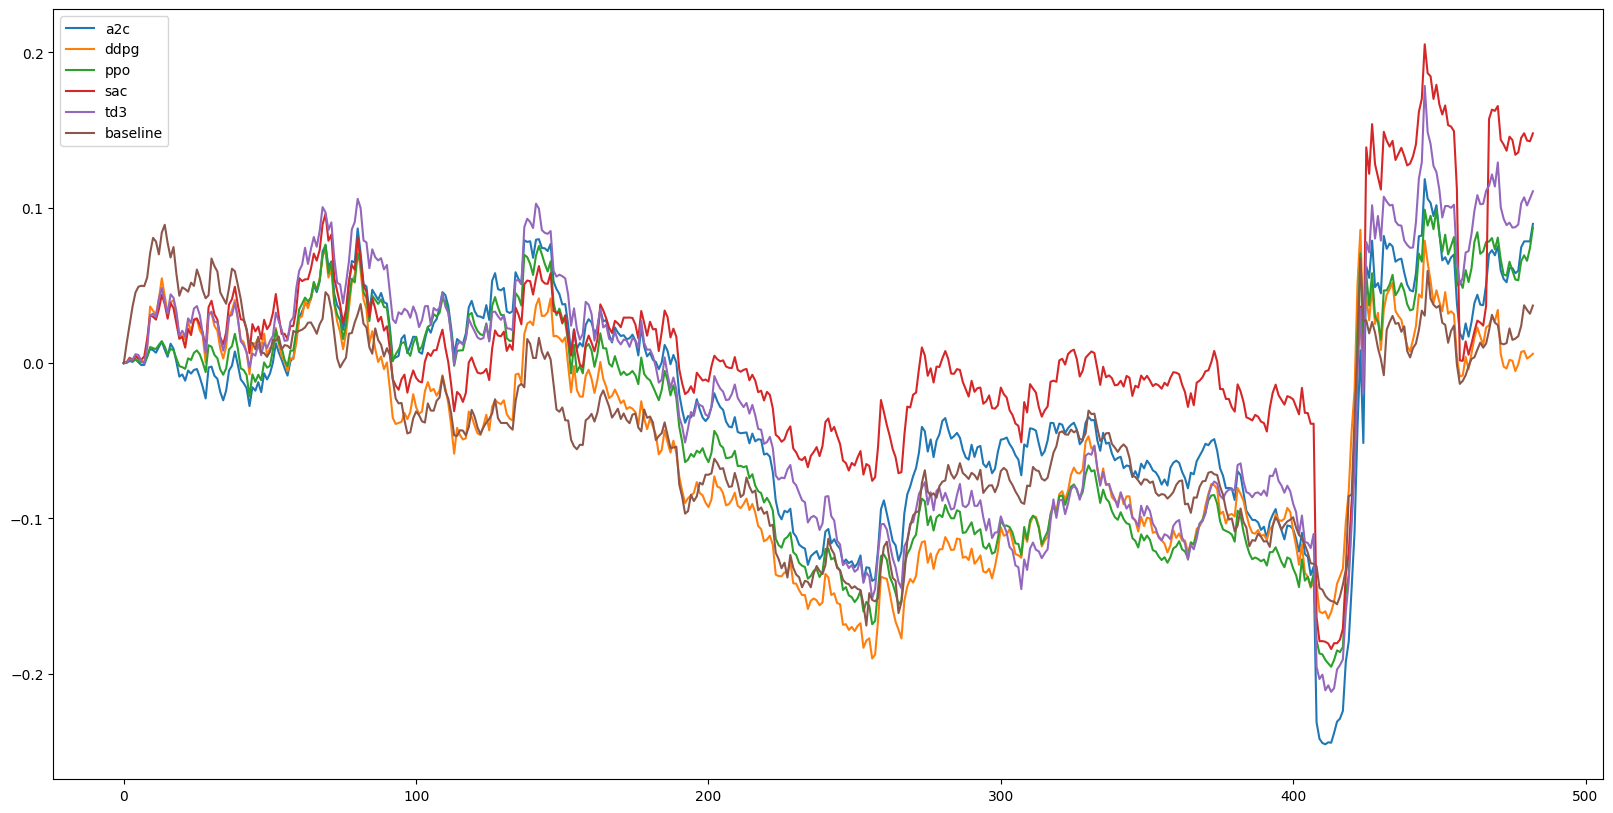

In [11]:
result_account_value.to_csv(os.path.join(root_path, "result_account_value.csv"), index=False)
result_account_value.plot(figsize = (20, 10))

## 展示 A2C 的回测结果

和 000016.SH 指数进行比较
   --- 开始下载 ----
   --- 下载完成 ----
DataFrame 的大小:  (484, 8)
账户价值数据日期范围: 2023-01-04 00:00:00 to 2024-12-31 00:00:00
基准指数数据日期范围: 2023-01-03 00:00:00 to 2024-12-31 00:00:00
共同日期数量: 483


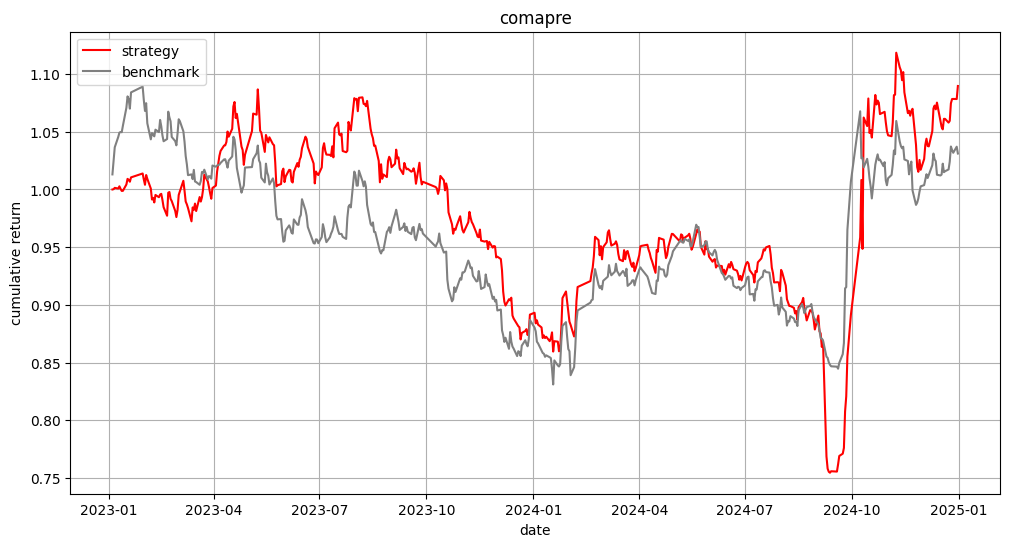

策略总收益率: 8.96%
基准总收益率: 1.78%
超额收益率: 7.18%
策略年化收益率: 4.40%
基准年化收益率: 0.89%
年化超额收益率: 3.51%
策略最大回撤: 30.56%
基准最大回撤: 23.69%


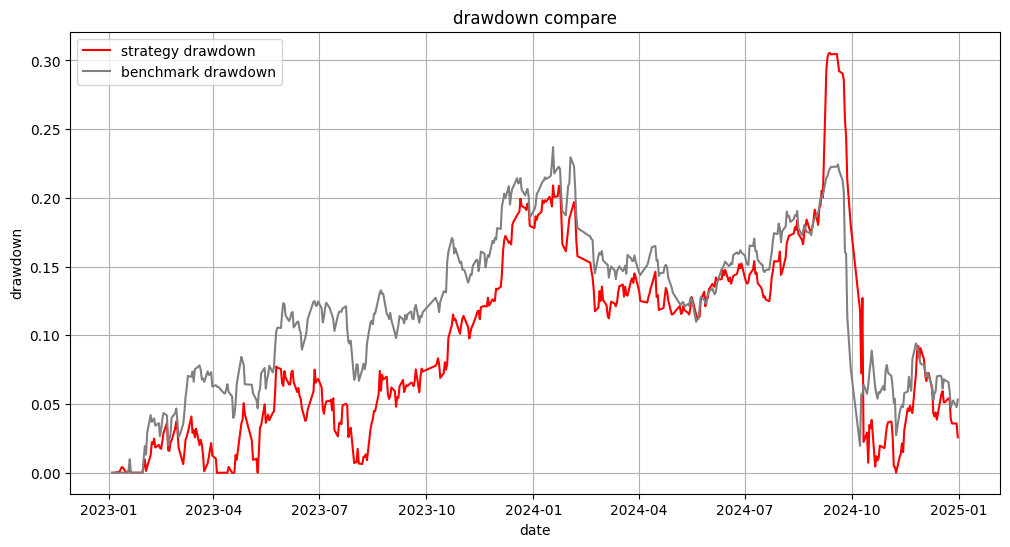

(                      cash   asset_value  total_assets    reward  cum_return  \
 date                                                                           
 2023-01-04  1000000.000000  0.000000e+00  1.000000e+06  0.000000    1.000000   
 2023-01-05   937128.749982  6.312739e+04  1.000256e+06  0.000067    1.000256   
 2023-01-06   871079.621693  1.303118e+05  1.001391e+06  0.000805    1.001391   
 2023-01-09   785499.182429  2.153331e+05  1.000832e+06 -0.001055    1.000832   
 2023-01-10   745502.645090  2.572252e+05  1.002728e+06  0.001530    1.002728   
 ...                    ...           ...           ...       ...         ...   
 2024-12-25   100879.326884  9.737463e+05  1.074626e+06  0.009891    1.074626   
 2024-12-26    56625.911604  1.021734e+06  1.078360e+06 -0.000505    1.078360   
 2024-12-27    35282.800155  1.043140e+06  1.078423e+06 -0.003936    1.078423   
 2024-12-30    58850.613604  1.019499e+06  1.078350e+06 -0.004099    1.078350   
 2024-12-31    33727.870244 

In [12]:
print("和 {} 指数进行比较".format(config.SSE_50_INDEX[0]))
simple_backtest_plot(a2c_account_value,
        baseline_start="20230101",
        baseline_end="20250101",
        baseline_ticker=config.SSE_50_INDEX,
        value_col_name = 'total_assets'
      )

## 展示 DDPG 的回测结果

和 000016.SH 指数进行比较
   --- 开始下载 ----
   --- 下载完成 ----
DataFrame 的大小:  (484, 8)
账户价值数据日期范围: 2023-01-04 00:00:00 to 2024-12-31 00:00:00
基准指数数据日期范围: 2023-01-03 00:00:00 to 2024-12-31 00:00:00
共同日期数量: 483


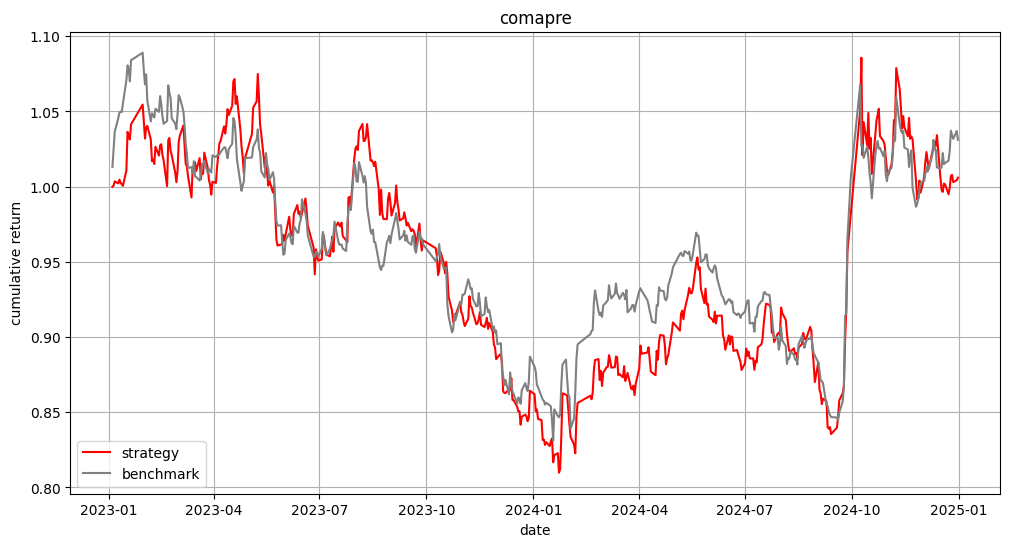

策略总收益率: 0.60%
基准总收益率: 1.78%
超额收益率: -1.18%
策略年化收益率: 0.30%
基准年化收益率: 0.89%
年化超额收益率: -0.59%
策略最大回撤: 24.67%
基准最大回撤: 23.69%


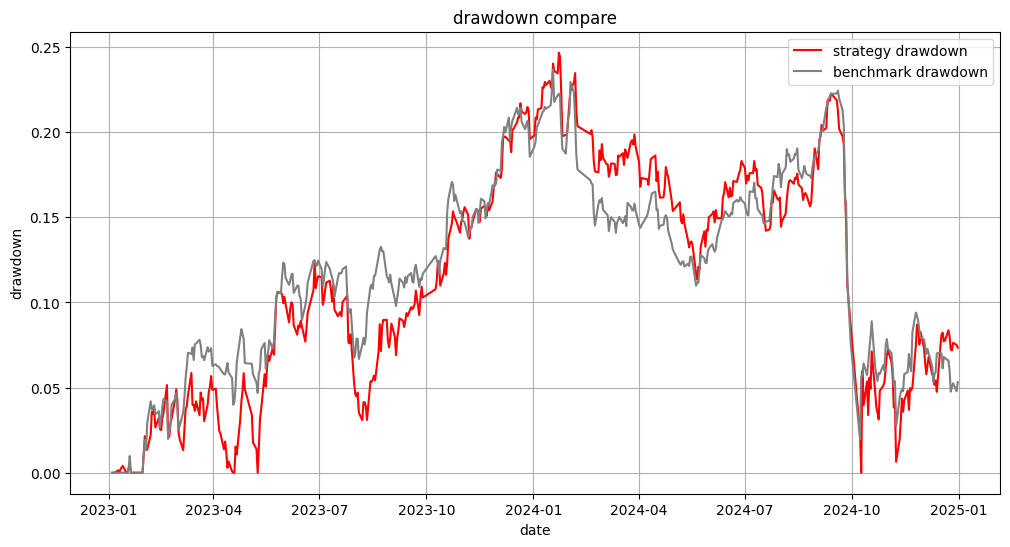

(                      cash    asset_value  total_assets    reward  cum_return  \
 date                                                                            
 2023-01-04  1000000.000000       0.000000  1.000000e+06  0.000000    1.000000   
 2023-01-05   874624.999509  126079.776105  1.000705e+06  0.000326    1.000705   
 2023-01-06   754222.189633  249326.051674  1.003548e+06  0.002442    1.003548   
 2023-01-09   618787.190529  383391.470500  1.002179e+06 -0.001935    1.002179   
 2023-01-10   533424.253313  471242.024513  1.004666e+06  0.002042    1.004666   
 ...                    ...            ...           ...       ...         ...   
 2024-12-25    97285.436101  909929.281124  1.007215e+06  0.000595    1.007215   
 2024-12-26    97285.436101  910549.492044  1.007835e+06 -0.006567    1.007835   
 2024-12-27    97285.436101  905696.973056  1.002982e+06 -0.012456    1.002982   
 2024-12-30    97285.436101  907003.620915  1.004289e+06 -0.006207    1.004289   
 2024-12-31    9

In [13]:
print("和 {} 指数进行比较".format(config.SSE_50_INDEX[0]))
simple_backtest_plot(ddpg_account_value,
        baseline_start="20230101",
        baseline_end="20250101",
        baseline_ticker=config.SSE_50_INDEX,
        value_col_name = 'total_assets'
      )

## 展示 PPO 的回测结果

和 000016.SH 指数进行比较
   --- 开始下载 ----
   --- 下载完成 ----
DataFrame 的大小:  (484, 8)
账户价值数据日期范围: 2023-01-04 00:00:00 to 2024-12-31 00:00:00
基准指数数据日期范围: 2023-01-03 00:00:00 to 2024-12-31 00:00:00
共同日期数量: 483


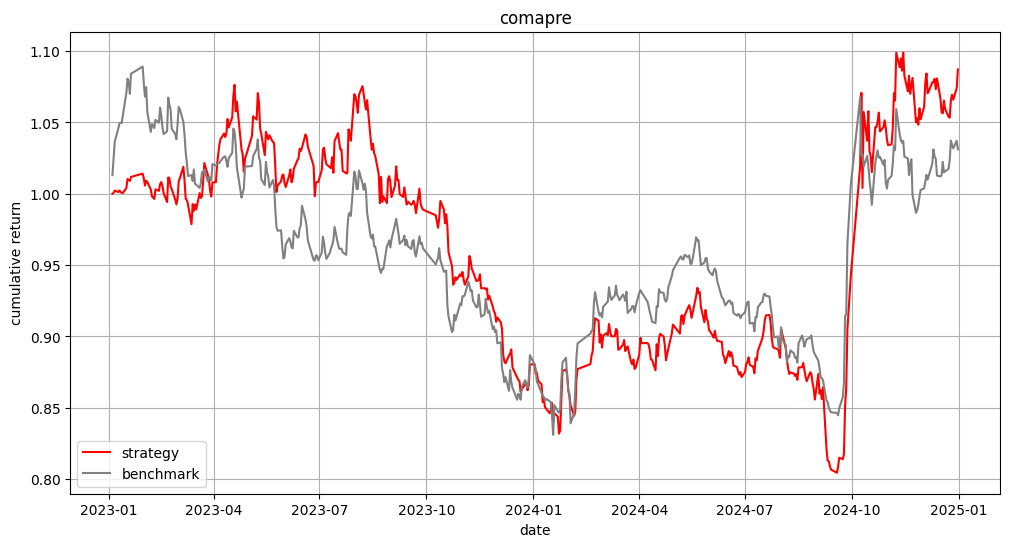

策略总收益率: 8.71%
基准总收益率: 1.78%
超额收益率: 6.93%
策略年化收益率: 4.28%
基准年化收益率: 0.89%
年化超额收益率: 3.39%
策略最大回撤: 25.25%
基准最大回撤: 23.69%


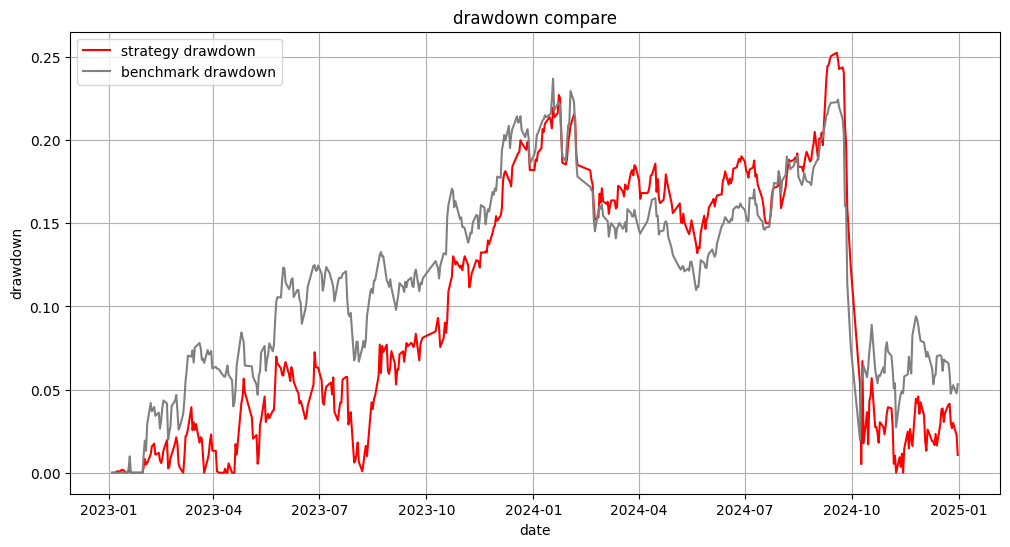

(                      cash   asset_value  total_assets    reward  cum_return  \
 date                                                                           
 2023-01-04  1000000.000000  0.000000e+00  1.000000e+06  0.000000    1.000000   
 2023-01-05   936678.569169  6.391261e+04  1.000591e+06  0.000399    1.000591   
 2023-01-06   890447.819964  1.117756e+05  1.002223e+06  0.001345    1.002223   
 2023-01-09   849366.136242  1.518307e+05  1.001197e+06 -0.001524    1.001197   
 2023-01-10   828847.465741  1.734580e+05  1.002305e+06  0.000817    1.002305   
 ...                    ...           ...           ...       ...         ...   
 2024-12-25    61151.342246  1.004500e+06  1.065651e+06  0.008279    1.065651   
 2024-12-26    86249.176037  9.831571e+05  1.069406e+06  0.000440    1.069406   
 2024-12-27    88907.529056  9.769866e+05  1.065894e+06 -0.006664    1.065894   
 2024-12-30    49495.091435  1.024557e+06  1.074052e+06  0.004980    1.074052   
 2024-12-31    40192.971808 

In [14]:
print("和 {} 指数进行比较".format(config.SSE_50_INDEX[0]))
simple_backtest_plot(ppo_account_value,
        baseline_start="20230101",
        baseline_end="20250101",
        baseline_ticker=config.SSE_50_INDEX,
        value_col_name = 'total_assets'
      )

## 展示 SAC 的回测结果

和 000016.SH 指数进行比较
   --- 开始下载 ----
   --- 下载完成 ----
DataFrame 的大小:  (484, 8)
账户价值数据日期范围: 2023-01-04 00:00:00 to 2024-12-31 00:00:00
基准指数数据日期范围: 2023-01-03 00:00:00 to 2024-12-31 00:00:00
共同日期数量: 483


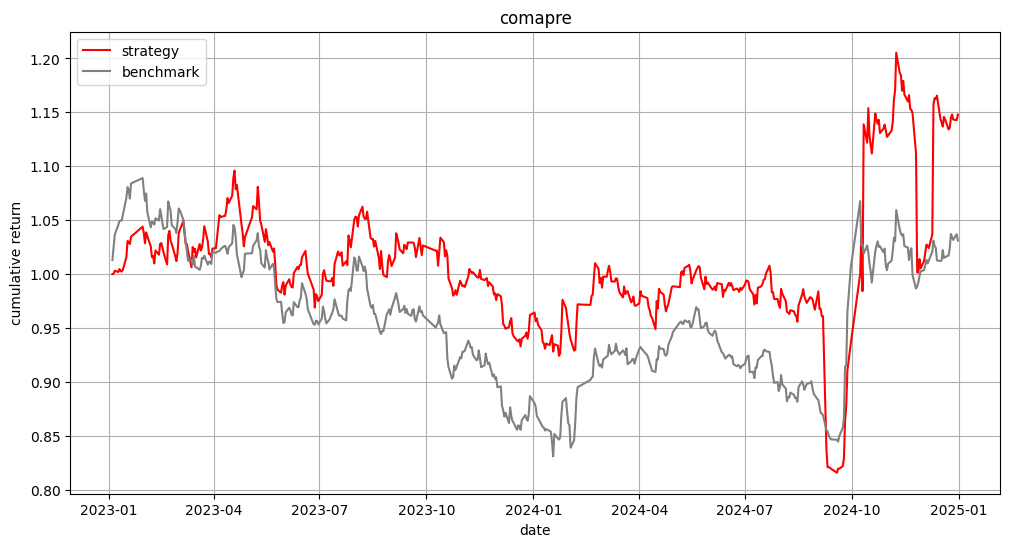

策略总收益率: 14.79%
基准总收益率: 1.78%
超额收益率: 13.01%
策略年化收益率: 7.17%
基准年化收益率: 0.89%
年化超额收益率: 6.28%
策略最大回撤: 25.56%
基准最大回撤: 23.69%


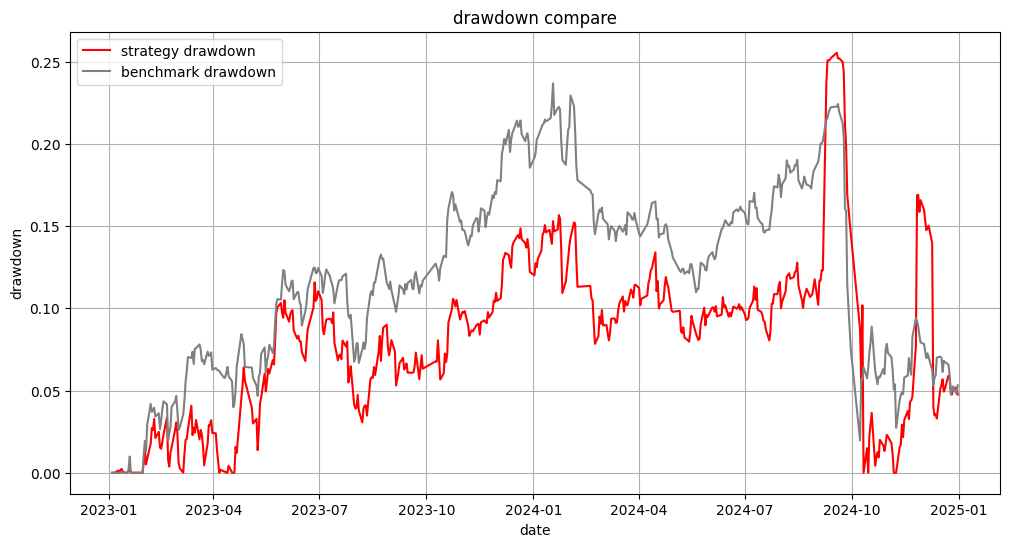

(                      cash   asset_value  total_assets    reward  cum_return  \
 date                                                                           
 2023-01-04  1000000.000000  0.000000e+00  1.000000e+06  0.000000    1.000000   
 2023-01-05   869610.000945  1.307710e+05  1.000381e+06 -0.000011    1.000381   
 2023-01-06   779054.983243  2.241676e+05  1.003223e+06  0.002411    1.003223   
 2023-01-09   683855.739632  3.180758e+05  1.001932e+06 -0.001819    1.001932   
 2023-01-10   583401.086164  4.212640e+05  1.004665e+06  0.002302    1.004665   
 ...                    ...           ...           ...       ...         ...   
 2024-12-25    58968.624565  1.086093e+06  1.145062e+06  0.003214    1.145062   
 2024-12-26    58968.624565  1.089046e+06  1.148015e+06 -0.002177    1.148015   
 2024-12-27    58968.624565  1.084354e+06  1.143323e+06 -0.009237    1.143323   
 2024-12-30    58968.624565  1.083880e+06  1.142849e+06 -0.005595    1.142849   
 2024-12-31    58968.624565 

In [15]:
print("和 {} 指数进行比较".format(config.SSE_50_INDEX[0]))
simple_backtest_plot(sac_account_value,
        baseline_start="20230101",
        baseline_end="20250101",
        baseline_ticker=config.SSE_50_INDEX,
        value_col_name = 'total_assets'
      )

## 展示 TD3 的回测结果

和 000016.SH 指数进行比较
   --- 开始下载 ----
   --- 下载完成 ----
DataFrame 的大小:  (484, 8)
账户价值数据日期范围: 2023-01-04 00:00:00 to 2024-12-31 00:00:00
基准指数数据日期范围: 2023-01-03 00:00:00 to 2024-12-31 00:00:00
共同日期数量: 483


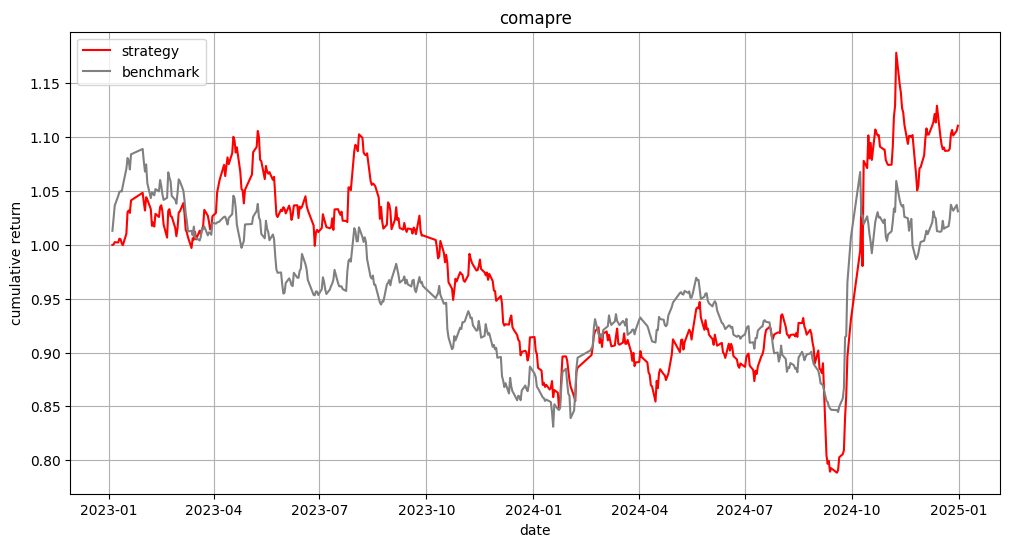

策略总收益率: 11.06%
基准总收益率: 1.78%
超额收益率: 9.28%
策略年化收益率: 5.41%
基准年化收益率: 0.89%
年化超额收益率: 4.52%
策略最大回撤: 28.70%
基准最大回撤: 23.69%


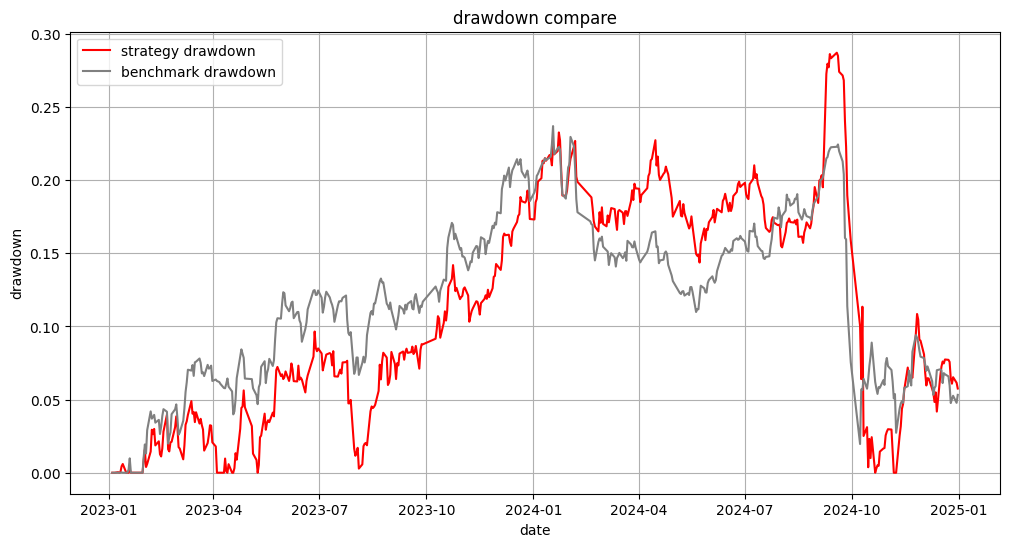

(                      cash   asset_value  total_assets    reward  cum_return  \
 date                                                                           
 2023-01-04  1000000.000000  0.000000e+00  1.000000e+06  0.000000    1.000000   
 2023-01-05   884654.999880  1.156664e+05  1.000321e+06 -0.000026    1.000321   
 2023-01-06   789280.000366  2.132631e+05  1.002543e+06  0.001839    1.002543   
 2023-01-09   678995.245164  3.231830e+05  1.002178e+06 -0.000790    1.002178   
 2023-01-10   588553.248778  4.171942e+05  1.005747e+06  0.003132    1.005747   
 ...                    ...           ...           ...       ...         ...   
 2024-12-25    13927.534663  1.088922e+06  1.102849e+06  0.005972    1.102849   
 2024-12-26    13927.534663  1.092839e+06  1.106767e+06 -0.002538    1.106767   
 2024-12-27    23886.536365  1.077653e+06  1.101540e+06 -0.011288    1.101540   
 2024-12-30    24051.630448  1.081947e+06  1.105999e+06 -0.002110    1.105999   
 2024-12-31    24051.630448 

In [16]:
print("和 {} 指数进行比较".format(config.SSE_50_INDEX[0]))
simple_backtest_plot(td3_account_value,
        baseline_start="20230101",
        baseline_end="20250101",
        baseline_ticker=config.SSE_50_INDEX,
        value_col_name = 'total_assets'
      )